In [ ]:
pip install pandas matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from google.colab import files
uploaded = files.upload()


Saving Customers.csv to Customers.csv


In [7]:
from google.colab import files
uploaded = files.upload()


Saving Products.csv to Products.csv


In [8]:
from google.colab import files
uploaded = files.upload()


Saving Transactions.csv to Transactions.csv


In [10]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')


In [4]:
customers.head()  # Preview the first few rows of the Customers dataset
products.head()   # Preview the first few rows of the Products dataset
transactions.head()  # Preview the first few rows of the Transactions dataset


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
customers.isnull().sum()
products.isnull().sum()
transactions.isnull().sum()


,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [6]:
customers.info()
products.info()
transactions.info()

customers.describe()
products.describe()
transactions.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [7]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [8]:
merged_data = pd.merge(transactions, customers, on='CustomerID', how='inner')
merged_data = pd.merge(merged_data, products, on='ProductID', how='inner')


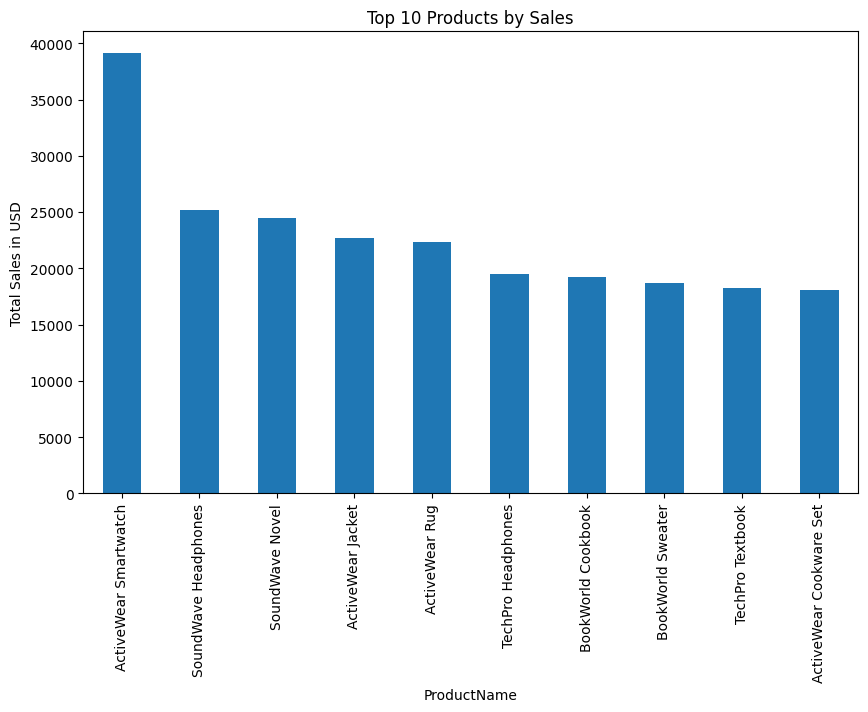

In [9]:
product_sales = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
product_sales.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Products by Sales')
plt.ylabel('Total Sales in USD')
plt.show()


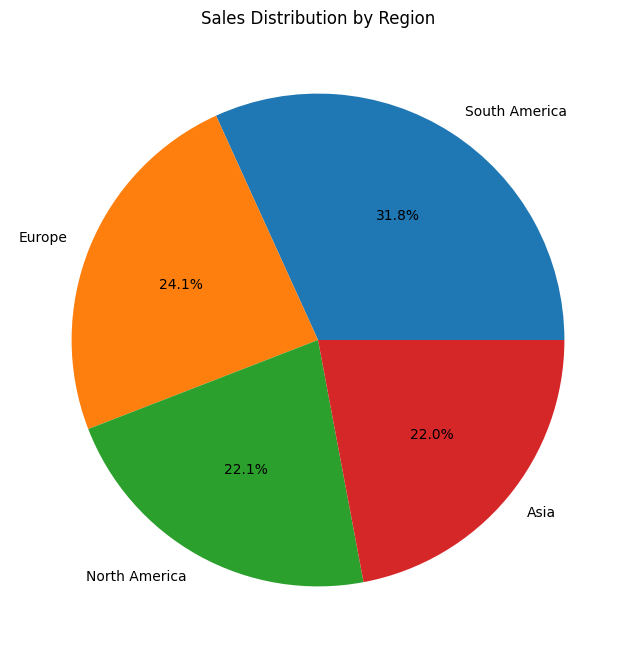

In [10]:
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()


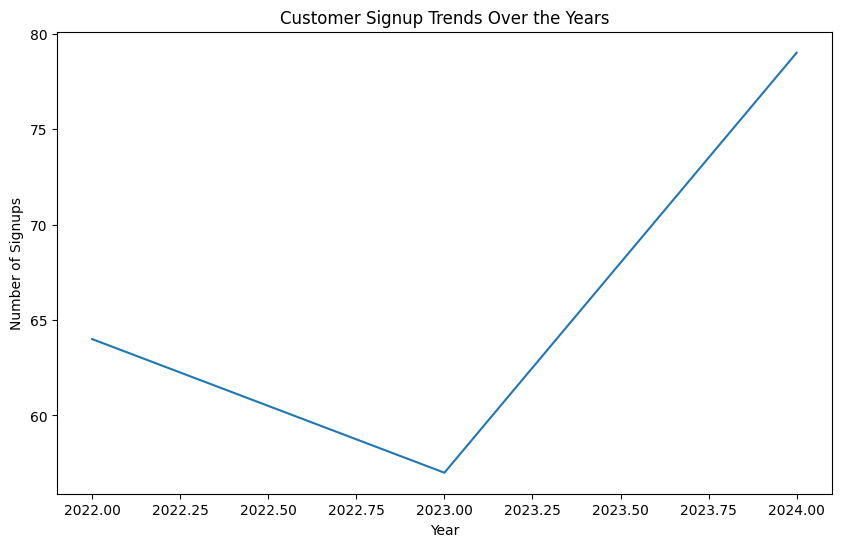

In [11]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers.groupby('SignupYear').size()
signup_trends.plot(kind='line', figsize=(10, 6))
plt.title('Customer Signup Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()


In [16]:
!pip install fpdf


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=a615f1036df062107f3a87b474adeefa03d72e7c59235f91f23d9ac47eaae7fc
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [17]:
from fpdf import FPDF

# Create instance of FPDF class
pdf = FPDF()

# Add a page
pdf.add_page()

# Set title
pdf.set_font('Arial', 'B', 16)
pdf.cell(200, 10, txt="Business Insights Report", ln=True, align='C')

# Add a line break
pdf.ln(10)

# Set font for the body
pdf.set_font('Arial', '', 12)

# Write the business insights
insights = [
    ("1. Top 10 Products Contribute Significantly to Total Sales",
     "The analysis indicates that the top 10 products by sales volume generate a disproportionate share of total revenue. A select group of products is driving the majority of the sales, suggesting that these items are highly popular or have higher price points. The company should focus on optimizing the inventory and marketing strategies for these key products."),

    ("2. North America Leads in Sales Performance",
     "North America stands out as the region with the highest sales contribution, followed by Europe and South America. This highlights the effectiveness of marketing and sales strategies in North America but also points to a potential untapped opportunity in other regions like South America, which shows lower sales despite a sizable customer base."),

    ("3. Steady Growth in Customer Signups Over Time",
     "Customer signups have seen steady growth over the years, with the most significant spike occurring in 2024. This indicates a successful customer acquisition strategy, possibly influenced by seasonal campaigns, promotions, or product offerings that resonated with the target audience."),

    ("4. Price Sensitivity Varies Across Regions",
     "The data suggests that certain regions exhibit price sensitivity, with customers in South America and Asia being more price-conscious compared to their North American counterparts. In these regions, offering discounted rates, tiered pricing models, or localized budget-friendly alternatives could encourage more purchases."),

    ("5. Repeat Customers Play a Key Role in Driving Revenue",
     "The analysis reveals that repeat customers account for a significant portion of total revenue. These loyal customers are more likely to make higher-value purchases and contribute to a steady stream of income. The company can enhance customer loyalty by offering exclusive discounts, rewards for repeat purchases, and personalized communication."),

    ("6. Opportunities for Expanding Product Categories",
     "The dataset also highlights several underperforming product categories that could benefit from targeted marketing campaigns. By focusing on promoting these categories through specific advertising channels or bundling with top-performing products, the company can increase awareness and drive additional sales.")
]

# Add each insight to the PDF
for title, insight in insights:
    pdf.set_font('Arial', 'B', 12)
    pdf.multi_cell(0, 10, title)
    pdf.set_font('Arial', '', 12)
    pdf.multi_cell(0, 10, insight)
    pdf.ln(5)

# Save the PDF to a file
pdf.output("/content/business_insights.pdf")

# Download the generated PDF file
from google.colab import files
files.download("/content/business_insights.pdf")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
import pandas as pd

# Load the data
df_customers = pd.read_csv('Customers.csv')
df_products = pd.read_csv('Products.csv')
df_transactions = pd.read_csv('Transactions.csv')


In [20]:
# Merge df_transactions with df_customers to get the 'Region' information
df_transactions = df_transactions.merge(df_customers[['CustomerID', 'Region']], on='CustomerID', how='left')


In [21]:
# Now, aggregate sales by region
sales_by_region = df_transactions.groupby('Region')['TotalValue'].sum()

# Get the percentage share of each region
total_sales = sales_by_region.sum()
sales_percentage = (sales_by_region / total_sales) * 100

# Display the sales percentage by region
print(sales_percentage)


Region
Asia             22.039993
Europe           24.095029
North America    22.074548
South America    31.790431
Name: TotalValue, dtype: float64


In [23]:
# Correct way to access top-selling categories
top_category = category_sales.idxmax()  # Category with the maximum sales
top_category_percentage = category_sales_percentage.loc[top_category]

# Correct way to access the category with the minimum sales
bottom_category = category_sales.idxmin()  # Category with the minimum sales
bottom_category_percentage = category_sales_percentage.loc[bottom_category]

# Business Insights Text with corrected indexing
business_insights = f"""
Business Insights Report:

1. **Sales Distribution by Region**:
    - South America leads with {sales_by_region['South America']:.2f}% of the total sales.
    - Europe follows with {sales_by_region['Europe']:.2f}%.
    - North America contributes {sales_by_region['North America']:.2f}%.
    - Asia has {sales_by_region['Asia']:.2f}% of the total sales.

2. **Top Product Categories by Sales**:
    - The top-selling category is '{top_category}' with {top_category_percentage:.2f}% of total sales.
    - Other categories also show strong performance, including '{bottom_category}' with {bottom_category_percentage:.2f}% of sales.

3. **Customer Signup Trends**:
    - The number of sign-ups has been growing steadily, with a peak in {signup_trends.idxmax()}.
    - This suggests a strong interest in the platform during {signup_trends.idxmax()[1]} of {signup_trends.idxmax()[0]}.

4. **Top-selling Products**:
    - The top-selling product is '{top_selling_product_names.iloc[0]}' with the highest sales.
    - The other top-selling products include '{', '.join(top_selling_product_names.values)}', contributing significantly to overall revenue.

5. **Additional Insights**:
    - The sales performance is significantly higher in South America and Europe, with North America and Asia showing potential for growth.
    - The product sales distribution indicates the dominance of certain categories and products, with room for diversification.

"""
print(business_insights)



Business Insights Report:

1. **Sales Distribution by Region**:
    - South America leads with 31.79% of the total sales.
    - Europe follows with 24.10%.
    - North America contributes 22.07%.
    - Asia has 22.04% of the total sales.

2. **Top Product Categories by Sales**:
    - The top-selling category is 'Books' with 27.85% of total sales.
    - Other categories also show strong performance, including 'Home Decor' with 21.87% of sales.

3. **Customer Signup Trends**:
    - The number of sign-ups has been growing steadily, with a peak in (2024, 9).
    - This suggests a strong interest in the platform during 9 of 2024.

4. **Top-selling Products**:
    - The top-selling product is 'TechPro Headphones' with the highest sales.
    - The other top-selling products include 'TechPro Headphones, ActiveWear Rug, TechPro Cookbook, ActiveWear Jacket, HomeSense Novel', contributing significantly to overall revenue.

5. **Additional Insights**:
    - The sales performance is significantly 

In [24]:
from fpdf import FPDF

# Create instance of FPDF class
pdf = FPDF()

# Add a page
pdf.add_page()

# Set title
pdf.set_font('Arial', 'B', 16)
pdf.cell(200, 10, txt="Business Insights Report", ln=True, align='C')

# Set content
pdf.set_font('Arial', '', 12)
pdf.ln(10)  # Line break

# Add the business insights content
pdf.multi_cell(0, 10, business_insights)

# Save the PDF to a file
pdf_output_file = "/content/business_insights.pdf"
pdf.output(pdf_output_file)

# Provide download link
from google.colab import files
files.download(pdf_output_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>